In [315]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [316]:
train_a = pd.read_parquet('../A/train_targets.parquet')
train_b = pd.read_parquet('../B/train_targets.parquet')
train_c = pd.read_parquet('../C/train_targets.parquet')

X_train_estimated_a = pd.read_parquet('../A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('../B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('../C/X_train_estimated.parquet')

X_train_observed_a = pd.read_parquet('../A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('../B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('../C/X_train_observed.parquet')

In [317]:
train_b.columns

Index(['time', 'pv_measurement'], dtype='object')

In [318]:
print(train_b['time'].dtype)

datetime64[us]


In [319]:
#dropping train_b constant values for range 13409, 14466
train_b = train_b.drop(train_b.iloc[13409:14466].index)
train_b = train_b.drop(train_b.iloc[11000:11300].index)

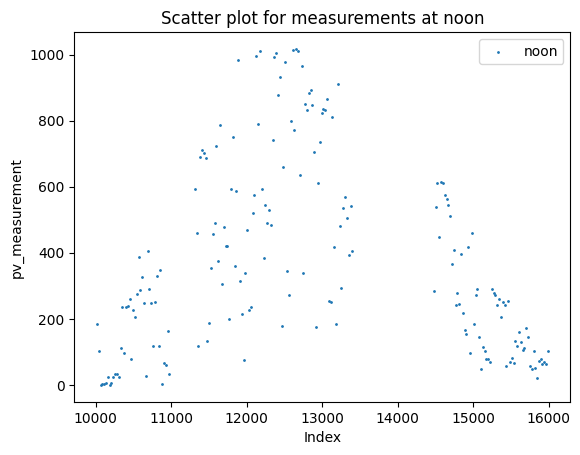

In [325]:
# Define the x_start and x_end values
x_start = 10000
x_end = 16000

# Filter the DataFrame to get rows where the 'time' is noon
subset_noon = train_b[(train_b['time'].dt.hour == 12) & (train_b['time'].dt.minute == 0)]

# Now create a mask based on the index values of the subset_noon DataFrame
subset_mask = (subset_noon.index >= x_start) & (subset_noon.index <= x_end)

# Apply the mask to the DataFrame and plot
plt.scatter(subset_noon.index[subset_mask], subset_noon['pv_measurement'][subset_mask], label='noon', s=1)

# Plotting details
plt.xlabel('Index')
plt.ylabel('pv_measurement')
plt.title('Scatter plot for measurements at noon')
plt.legend()
plt.show()


In [324]:
# Restrict x-values
x_start = 7500
x_end =  17500
subset_mask = (x >= x_start) & (x <= x_end)

# Filter the DataFrame to get rows where the 'time' is noon
subset_noon = train_b[(train_b['time'].dt.hour == 12) & (train_b['time'].dt.minute == 0)]
subset_three = train_b[(train_b['time'].dt.hour == 15) & (train_b['time'].dt.minute == 0)]
subset_six = train_b[(train_b['time'].dt.hour == 18) & (train_b['time'].dt.minute == 0)]
#subset_midnight = train_b[(train_b['time'].dt.hour == 00) & (train_b['time'].dt.minute == 0)]

# Plotting the subset
plt.scatter(subset_noon.index[subset_mask], subset_noon['pv_measurement'][subset_mask], label='noon', s = 1)
#plt.scatter(subset_three.index[subset_mask], subset_three['pv_measurement'][subset_mask], label='three', s = 1)
#plt.scatter(subset_six.index[subset_mask], subset_six['pv_measurement'][subset_mask], label='six', s = 1)
#plt.scatter(subset_midnight.index, subset_midnight['pv_measurement'], label='midnight', s = 1)


# Compute the quadratic fit
x = subset_noon.index[subset_mask]
y = subset_noon['pv_measurement'][subset_mask]
coefficients = np.polyfit(x, y, 2)  # 2 specifies that it's quadratic
polynomial = np.poly1d(coefficients)
y_fit = polynomial(x) # Generate y values of the fitted curve
# Create the plot
plt.plot(x, y_fit, color='blue', label='noon fit')


# plotting
plt.xlabel('Index')
plt.ylabel('pv_measurement')
plt.title('Scatter plot for measurements at noon')
plt.legend()
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1313 but corresponding boolean dimension is 372

In [234]:


plt.scatter(train_b.index, train_b['pv_measurement'], s = 1)

plt.xlabel('index')
plt.ylabel('pv_measurement')
plt.show()


KeyError: False

<Axes: >

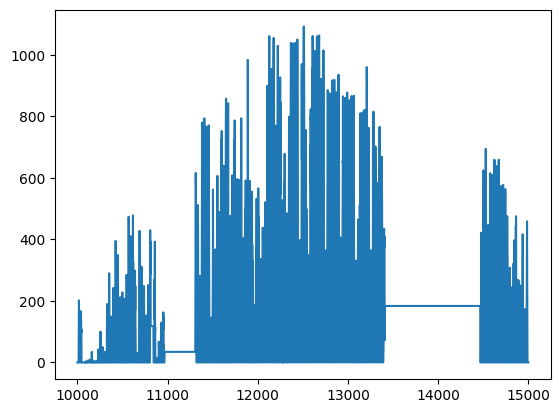

In [219]:
train_b['pv_measurement'].iloc[10000:15000].plot()

In [254]:
#dropping train_b constant values for range 13409, 14466
train_b = train_b.drop(train_b.iloc[13409:14466].index)

<Axes: xlabel='time'>

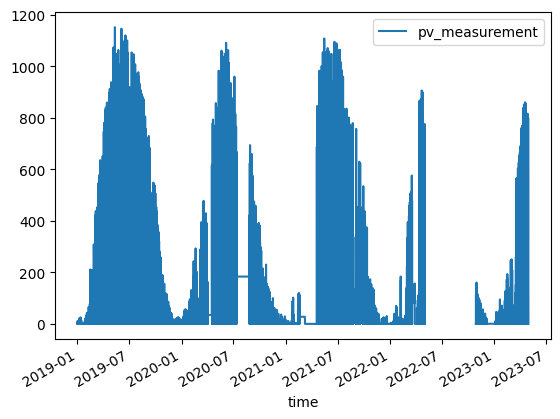

In [206]:
train_b_time_index = train_b.set_index('time')
train_b_time_index.plot()

<Axes: >

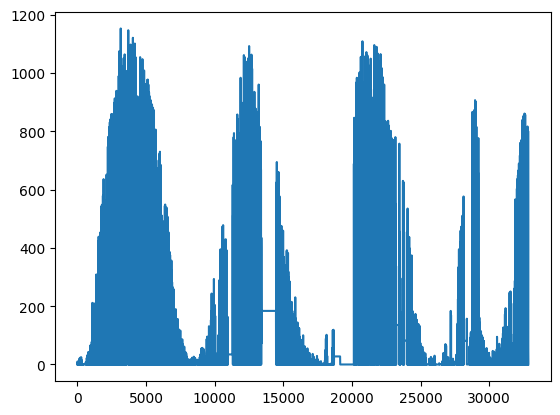

In [187]:
train_b['pv_measurement'].plot()

<Axes: >

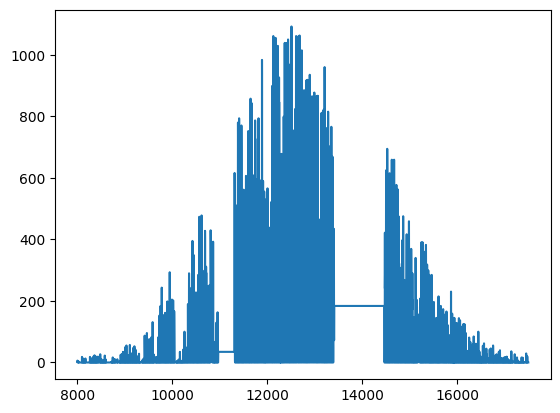

In [188]:
train_b['pv_measurement'].iloc[8000:17500].plot()

<Axes: xlabel='time'>

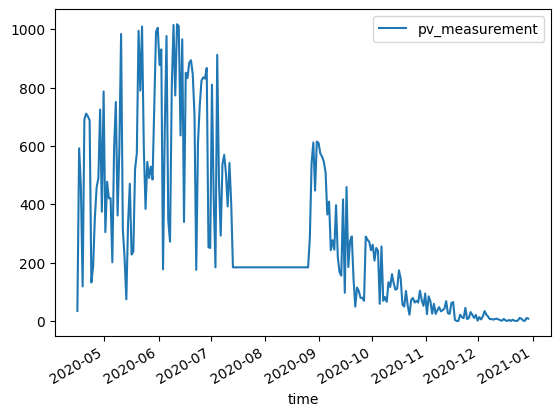

In [189]:
# Determine integer position for a datetime range
start_loc = train_b_time_index.index.get_loc('2020-04-15 10:00:00')
end_loc = train_b_time_index.index.get_loc('2020-12-30 08:00:00')

# Use .iloc to slice the DataFrame based on the positions
selected_data = train_b_time_index.iloc[start_loc:end_loc+1]
selected_data_noon = selected_data[selected_data.index.hour == 12]
selected_data_noon.plot()

In [190]:
import numpy as np
import matplotlib.pyplot as plt

# Convert the datetime index to a numerical format (timestamp)
numerical_time_values = time_values.astype(np.int64) 

# Fit the quadratic curve using numpy's polyfit function
coefficients = np.polyfit(numerical_time_values, selected_data_noon['pv_measurement'], 2)
polynomial = np.poly1d(coefficients)

# Generate y values of the fitted curve
y_fit = polynomial(numerical_time_values)

print(coefficients)
'''
# Plot the fitted curve and original data
plt.plot(time_values, y_fit, label='Fitted Quadratic Curve', color='red', linewidth=2)
plt.scatter(time_values, selected_data_noon['pv_measurement'], label='Original Data')
plt.legend()
plt.show()
'''

TypeError: expected x and y to have same length

In [135]:
fit_data = selected_data_noon.dropna(subset=['pv_measurement'])


In [136]:
numerical_time_values_fit = fit_data.index.astype(np.int64)
scaled_time_values_fit = (numerical_time_values_fit - numerical_time_values_fit.min())


In [137]:
coefficients = np.polyfit(scaled_time_values_fit, fit_data['pv_measurement'], 4)
polynomial = np.poly1d(coefficients)


In [138]:
numerical_time_values_all = selected_data_noon.index.astype(np.int64)
scaled_time_values_all = (numerical_time_values_all - numerical_time_values_fit.min())
y_fit_all = polynomial(scaled_time_values_all)


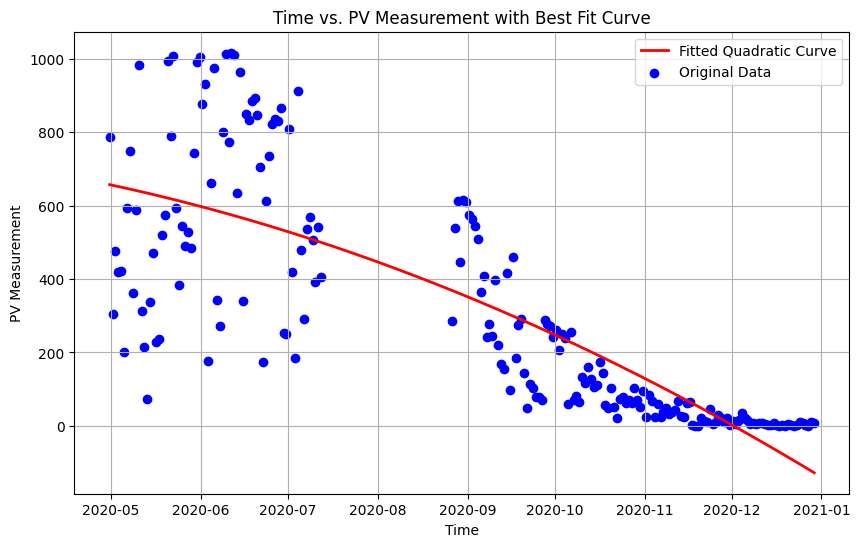

In [93]:
plt.figure(figsize=(10, 6))
plt.plot(selected_data_noon.index, y_fit_all, label='Fitted Quadratic Curve', color='red', linewidth=2)
plt.scatter(selected_data_noon.index, selected_data_noon['pv_measurement'], label='Original Data', color='blue')
plt.title('Time vs. PV Measurement with Best Fit Curve')
plt.xlabel('Time')
plt.ylabel('PV Measurement')
plt.legend()
plt.grid(True)
plt.show()
